<p style="font-size:300%;font-family:Source Sans Pro;text-align:center;line-height:50px;">Final Project<br>FUEL PRODUCTION VS COMSUMPTION</p>

<table style="width:100%;font-family:'Roboto'; font-size:120%">
  <tr>
    <th colspan="3" style="text-align: center; vertical-align: middle;">
      MEMBERS & TASKS  
    </th>
  </tr>
  <tr>
    <th style="text-size:150%; text-align: center; vertical-align: middle;">ID</th>
    <th style="text-align: center; vertical-align: middle;">NAME</th>
    <th style="text-align: center; vertical-align: middle;">TASK</th>
  </tr>
  <tr>
    <td style="text-align: left; vertical-align: middle;">20127597</td>
    <td style="text-align: left; vertical-align: middle;">Bùi Tấn Phương</td>
  </tr>
  <tr>
    <td style="text-align: left; vertical-align: middle;">20127525</td>
    <td style="text-align: left; vertical-align: middle;">Trần Quốc Trung</td>
  </tr>
</table>

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# 1. Data collection:

**Subject:** Spotify Top 200 Charts (2020-2021)  
**Source:** [Spotify Top 200 Charts (2020-2021)](www.kaggle.com/datasets/sashankpillai/spotify-top-200-charts-20202021)  
**Author's consent & License:** This dataset was uploaded onto Kaggle by [SASHANK PILLAI](www.kaggle.com/sashankpillai) with *Data files © Original Authors* license.  
**Author data collection method:** This dataset would not be possible without the help of spotifycharts.com and Spotipy Python Library.  

# 2. Exploring data:

In [2]:
df = pd.read_csv('spotify_dataset.csv')
df.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


We can see a redundant column `Index` **&rarr; So, We can set it as index**.  
Additionally, we can modify name columns name (replace blank space, convert to lowercase) for further analyzation to be more convinient.

In [3]:
def modifyColumnsName(x):
    res = x.replace('(', '')
    res = res.replace(')', '')
    res = res.replace(' ', '_')
    res = res.lower()
    return res

df = df.set_index('Index')
df.index.name = None

df.columns = list(map(lambda _ : modifyColumnsName(_), df.columns.tolist()))
df.head()

,highest_charting_position,number_of_times_charted,week_of_highest_charting,song_name,streams,artist,artist_followers,song_id,genre,release_date,...,danceability,energy,loudness,speechiness,acousticness,liveness,tempo,duration_ms,valence,chord
1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",2017-12-08,...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],2021-07-09,...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],2021-05-21,...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",2021-06-25,...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


## Number of rows and columns?

In [4]:
n_rows, n_cols = df.shape
print(f'Dataset has {n_rows} rows and {n_cols} columns!')

Dataset has 1556 rows and 22 columns!


## Are there any duplicates? 

In [5]:
any(df.duplicated())

False

## Meaning of each columns:

The dataset include all the songs that have been on the Top 200 Weekly (Global) charts of Spotify in 2020 & 2021. The dataset include the following features:

- `Highest Charting Position`: The highest position that the song has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
- `Number of Times Charted`: The number of times that the song has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
- `Week of Highest Charting`: The week when the song had the Highest Position in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
- `Song Name`: Name of the song that has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
- `Song iD`: The song ID provided by Spotify (unique to each song).
- `Streams`: Approximate number of streams the song has.
- `Artist`: The main artist/ artists involved in making the song.
- `Artist Followers`: The number of followers the main artist has on Spotify.
- `Genre`: The genres the song belongs to.
- `Release Date`: The initial date that the song was released.
- `Weeks Charted`: The weeks that the song has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
- `Popularity`:The popularity of the track. The value will be between 0 and 100, with 100 being the most popular.
- `Danceability`: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- `Acousticness`: A measure from 0.0 to 1.0 of whether the track is acoustic.
- `Energy`: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.
- `Liveness`: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.
- `Loudness`: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track. Values typical range between -60 and 0 db.
- `Speechiness`: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.
- `Tempo`: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- `Valence`: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- `Chord`: The main chord of the song instrumental.

## What is the datatype of each column? Are there any columns with datatypes that are not suitable for further processing?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1556 entries, 1 to 1556
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   highest_charting_position  1556 non-null   int64 
 1   number_of_times_charted    1556 non-null   int64 
 2   week_of_highest_charting   1556 non-null   object
 3   song_name                  1556 non-null   object
 4   streams                    1556 non-null   object
 5   artist                     1556 non-null   object
 6   artist_followers           1556 non-null   object
 7   song_id                    1556 non-null   object
 8   genre                      1556 non-null   object
 9   release_date               1556 non-null   object
 10  weeks_charted              1556 non-null   object
 11  popularity                 1556 non-null   object
 12  danceability               1556 non-null   object
 13  energy                     1556 non-null   object
 14  loudness

**We should change dtype of:**
- "Release_Date" from `str` to `datetime`.  
- "Streams", "Artist_Followers", "Popularity" and "Duration_(ms)" from `str` to `int`.
- "Danceability", "Energy", "Loudness", "Speechiness", "Acousticness", "Liveness", "Tempo" and "Valence" from `str` to `float`.

---

## Preprocessing:

### Drop fake `NaN` values:
With a quick glance, we can relize that this dataframe use **blank** character to replace `NaN` values. Moreover, if a row have one **blank**, almost its others features will be **blank**.

In [7]:
(df.loc[(df.release_date == ' ')] == ' ').sum(axis=0)

highest_charting_position     0
number_of_times_charted       0
week_of_highest_charting      0
song_name                     0
streams                       0
artist                        0
artist_followers             11
song_id                      11
genre                        11
release_date                 11
weeks_charted                 0
popularity                   11
danceability                 11
energy                       11
loudness                     11
speechiness                  11
acousticness                 11
liveness                     11
tempo                        11
duration_ms                  11
valence                      11
chord                        11
dtype: int64

Because there's not so much row, and they've lost most of data **&rarr; Drop it!**

In [8]:
df = df.loc[~(df.release_date == ' ')]
(df == ' ').sum(axis=0)

highest_charting_position    0
number_of_times_charted      0
week_of_highest_charting     0
song_name                    0
streams                      0
artist                       0
artist_followers             0
song_id                      0
genre                        0
release_date                 0
weeks_charted                0
popularity                   0
danceability                 0
energy                       0
loudness                     0
speechiness                  0
acousticness                 0
liveness                     0
tempo                        0
duration_ms                  0
valence                      0
chord                        0
dtype: int64

### Change dtype of "Release Date" to `datetime`

Initially, we can relize that "Release Date" features have `%Y-%m-%d` format. However, do all of them have that format?

In [9]:
pd.unique(df.release_date.apply(lambda x : len(x)))

array([10,  4,  7])

Surprisingly, there are 3 different types:
- 4 character format is `%Y` &rarr; we can suppose it is the first day of first month of this year.
- 7 character format is `%Y-%m` &rarr; we can suppose it is the first day of this month.
- The other is our expectation.

In [10]:
def fillMissingInfoDate(x):
    res = ''
    if len(x) == 4:
        res = x + '-01-01'
    elif len(x) == 7:
        res = x + '-01'
    else:
        res = x
    return res

df.release_date = pd.to_datetime(df.release_date.apply(fillMissingInfoDate), format='%Y-%m-%d')

### Change dtype of "Streams", "Artist_Followers", "Popularity" and "Duration_(ms)" from `str` to `int`.

In [11]:
df.streams = df.streams.str.replace(',', '')
int_features = ['streams', 'artist_followers', 'popularity', 'duration_ms']
df[int_features] = df[int_features].astype('int')

### Change dtype of "Danceability", "Energy", "Loudness", "Speechiness", "Acousticness", "Liveness", "Tempo" and "Valence" from `str` to `float`.

In [12]:
float_features = ["danceability", "energy", "loudness", "speechiness", "acousticness", "liveness", "tempo", "valence"]
df[float_features] = df[float_features].astype('float')

**Check again!**

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545 entries, 1 to 1556
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   highest_charting_position  1545 non-null   int64         
 1   number_of_times_charted    1545 non-null   int64         
 2   week_of_highest_charting   1545 non-null   object        
 3   song_name                  1545 non-null   object        
 4   streams                    1545 non-null   int64         
 5   artist                     1545 non-null   object        
 6   artist_followers           1545 non-null   int64         
 7   song_id                    1545 non-null   object        
 8   genre                      1545 non-null   object        
 9   release_date               1545 non-null   datetime64[ns]
 10  weeks_charted              1545 non-null   object        
 11  popularity                 1545 non-null   int64         
 12  dancea

**&rarr; It's OK!**

## Distribution:

### Numeric:

In [14]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
highest_charting_position,1545.00,87.83,58.13,1.00,37.00,80.00,137.00,200.00
number_of_times_charted,1545.00,10.68,16.39,1.00,1.00,4.00,12.00,142.00
streams,1545.00,6337136.38,3375402.18,4176083.00,4915080.00,5269163.00,6452492.00,48633449.00
artist_followers,1545.00,14716902.87,16675788.51,4883.00,2123734.00,6852509.00,22698747.00,83337783.00
popularity,1545.00,70.09,15.82,0.00,65.00,73.00,80.00,100.00
danceability,1545.00,0.69,0.14,0.15,0.60,0.71,0.80,0.98
energy,1545.00,0.63,0.16,0.05,0.53,0.64,0.75,0.97
loudness,1545.00,-6.35,2.51,-25.17,-7.49,-5.99,-4.71,1.51
speechiness,1545.00,0.12,0.11,0.02,0.05,0.08,0.17,0.88
acousticness,1545.00,0.25,0.25,0.00,0.05,0.16,0.39,0.99


**&rarr; From above dataframe, we can relized there is not any missing values**

### Categorical:

In [15]:
categorical_df = df.select_dtypes(include='O')
categorical_df.describe(include='O').T

,count,unique,top,freq
week_of_highest_charting,1545,83,2019-12-27--2020-01-03,89
song_name,1545,1545,Caramelo,1
artist,1545,712,Taylor Swift,52
song_id,1545,1516,5uEYRdEIh9Bo4fpjDd4Na9,3
genre,1545,394,[],75
weeks_charted,1545,771,2020-12-18--2020-12-25,31
chord,1545,12,C#/Db,214


**&rarr; Similarly to numeric, we can easily relize there is not any missing value!**

In [16]:
categorical_diff_val = categorical_df.apply(lambda x : pd.unique(x))
categorical_num_diff_val = categorical_df.nunique()

pd.DataFrame([categorical_num_diff_val, categorical_diff_val], index=['number of different values', 'different values']).T

,number of different values,different values
week_of_highest_charting,83,"[2021-07-23--2021-07-30, 2021-06-25--2021-07-0..."
song_name,1545,"[Beggin', STAY (with Justin Bieber), good 4 u,..."
artist,712,"[Måneskin, The Kid LAROI, Olivia Rodrigo, Ed S..."
song_id,1516,"[3Wrjm47oTz2sjIgck11l5e, 5HCyWlXZPP0y6Gqq8TgA2..."
genre,394,"[['indie rock italiano', 'italian pop'], ['aus..."
weeks_charted,771,[2021-07-23--2021-07-30\n2021-07-16--2021-07-2...
chord,12,"[B, C#/Db, A, D#/Eb, G#/Ab, F#/Gb, C, D, A#/Bb..."


---

# 3. Propose meaningfull question and answer them:
- How did music change in 2020-2021 period?
- What was music trend in this period?
- How should we produce music to be on chart for as long as possible?
- What is the best time in year to release music?

---
## Preprocessing:

- Because "week_charted" have multiple week **&rarr; We should `explode` it**.  
- We will add "start_week_charted" to represent its time.  
- Additionally, we will add "year" column for comparing between years. However, a song can stand on chart in both 2020 and 2021 **&rarr; So we also `explode` it**

In [17]:
song_properties = ['weeks_charted', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'liveness', 'tempo', 'valence', 'duration_ms']
song_properties_df = df.loc[:, song_properties]

song_properties_df.weeks_charted = song_properties_df.weeks_charted.apply(lambda x : x.split('\n'))
song_properties_byweek_df = song_properties_df.explode('weeks_charted')
song_properties_byweek_df['start_week_charted'] = pd.to_datetime(song_properties_byweek_df.weeks_charted.apply(lambda x : (x.split('--')[0])))

def getYearOnBoard(weeks_on_chart):
    start = datetime.strptime(weeks_on_chart[-1].split('--')[0], '%Y-%m-%d')
    end = datetime.strptime(weeks_on_chart[0].split('--')[1], '%Y-%m-%d')
    years = [start.year] if start.year == end.year else [start.year, end.year]
    
    return years

song_properties_df['year'] = song_properties_df.weeks_charted.apply(getYearOnBoard)
song_properties_byyear_df = song_properties_df.explode('year')

---
## How did music properties change in the 2020-2021 period?

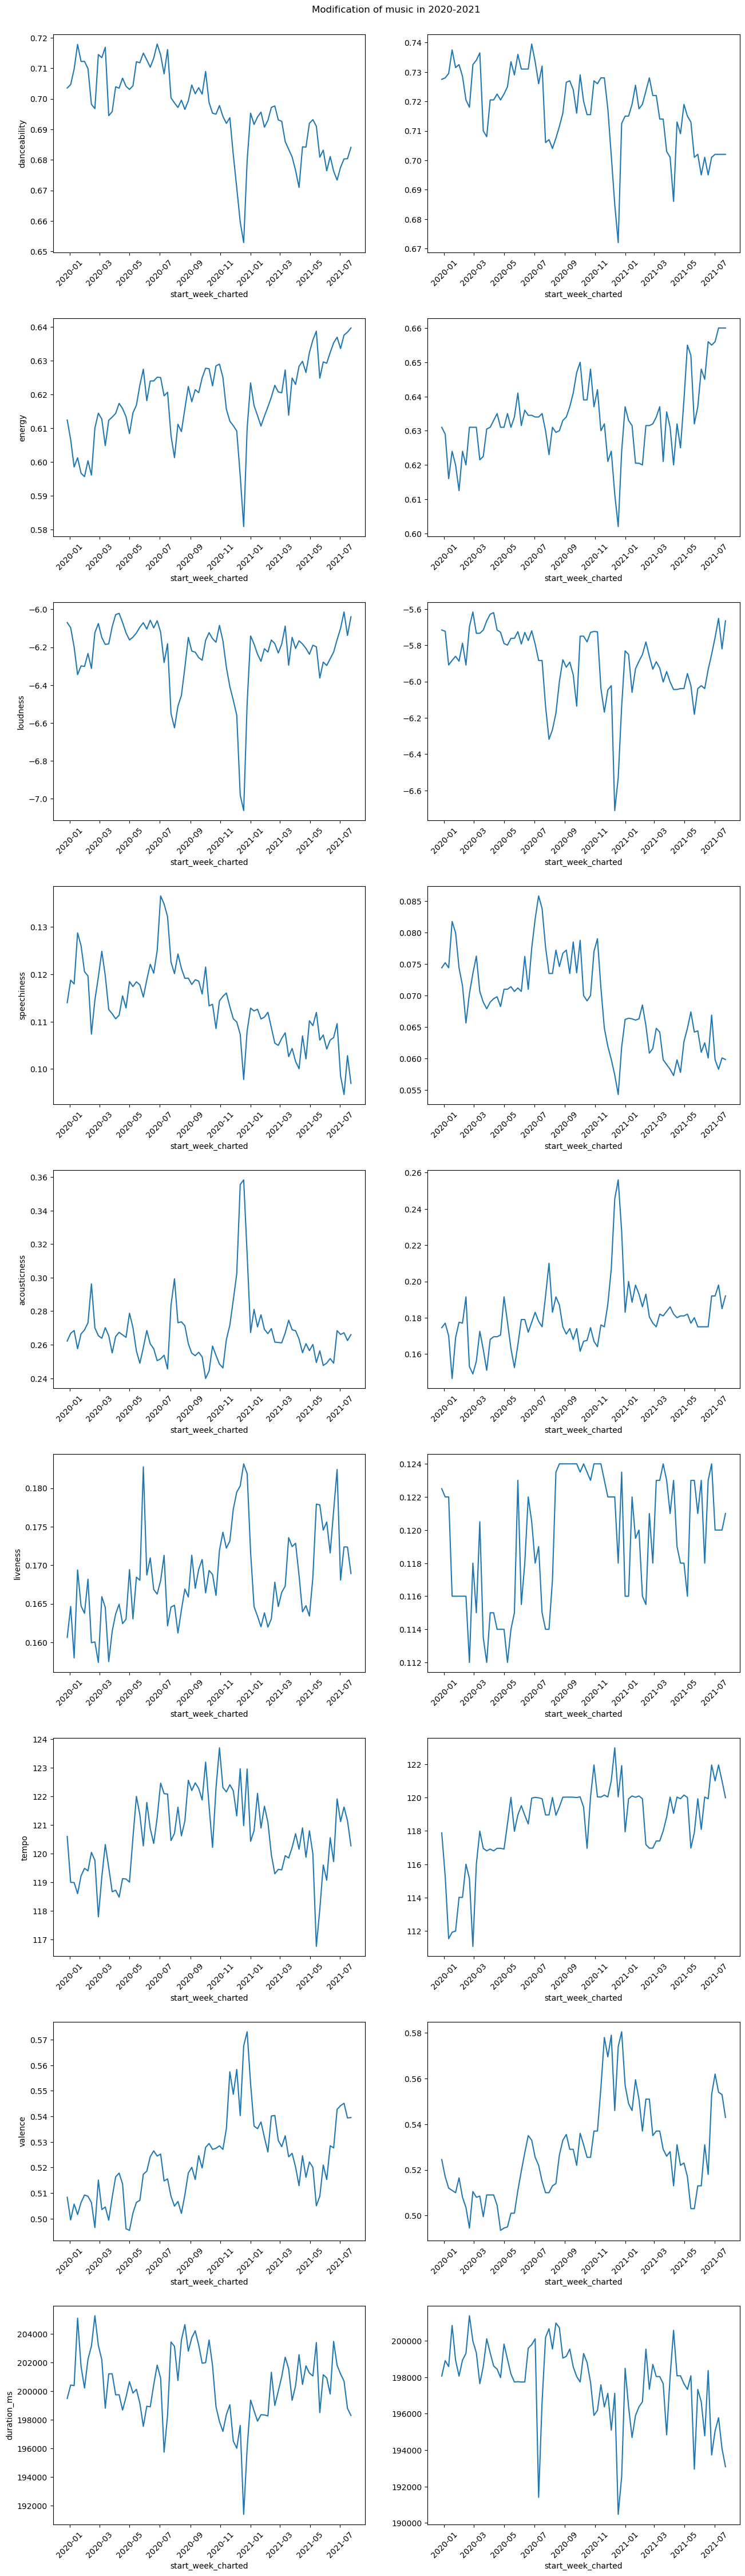

In [18]:
fig, axes = plt.subplots(9, 2, figsize=(15, 50))
fig.suptitle("Modification of music in 2020-2021")
# fig.subplots_adjust(top=0.9)
properties = song_properties_df.columns[1:]
for p, ax in zip(properties, axes):
    # sns.violinplot(song_properties_byweek_df[p], ax=ax[0])
    # ax[0].tick_params('x', labelrotation=45)

    meanline = song_properties_byweek_df.groupby('start_week_charted', as_index=False)[p].mean()
    sns.lineplot(x=meanline.start_week_charted, y=meanline[p], ci=None, ax=ax[0])  
    ax[0].tick_params('x', labelrotation=45)

    medianline = song_properties_byweek_df.groupby('start_week_charted', as_index=False)[p].median()
    sns.lineplot(x=medianline.start_week_charted, y=medianline[p], ci=None, ax=ax[1])
    ax[1].tick_params('x', labelrotation=45)
    ax[1].set_ylabel('')

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.97,
                    wspace=0.2,
                    hspace=0.3)

plt.show()

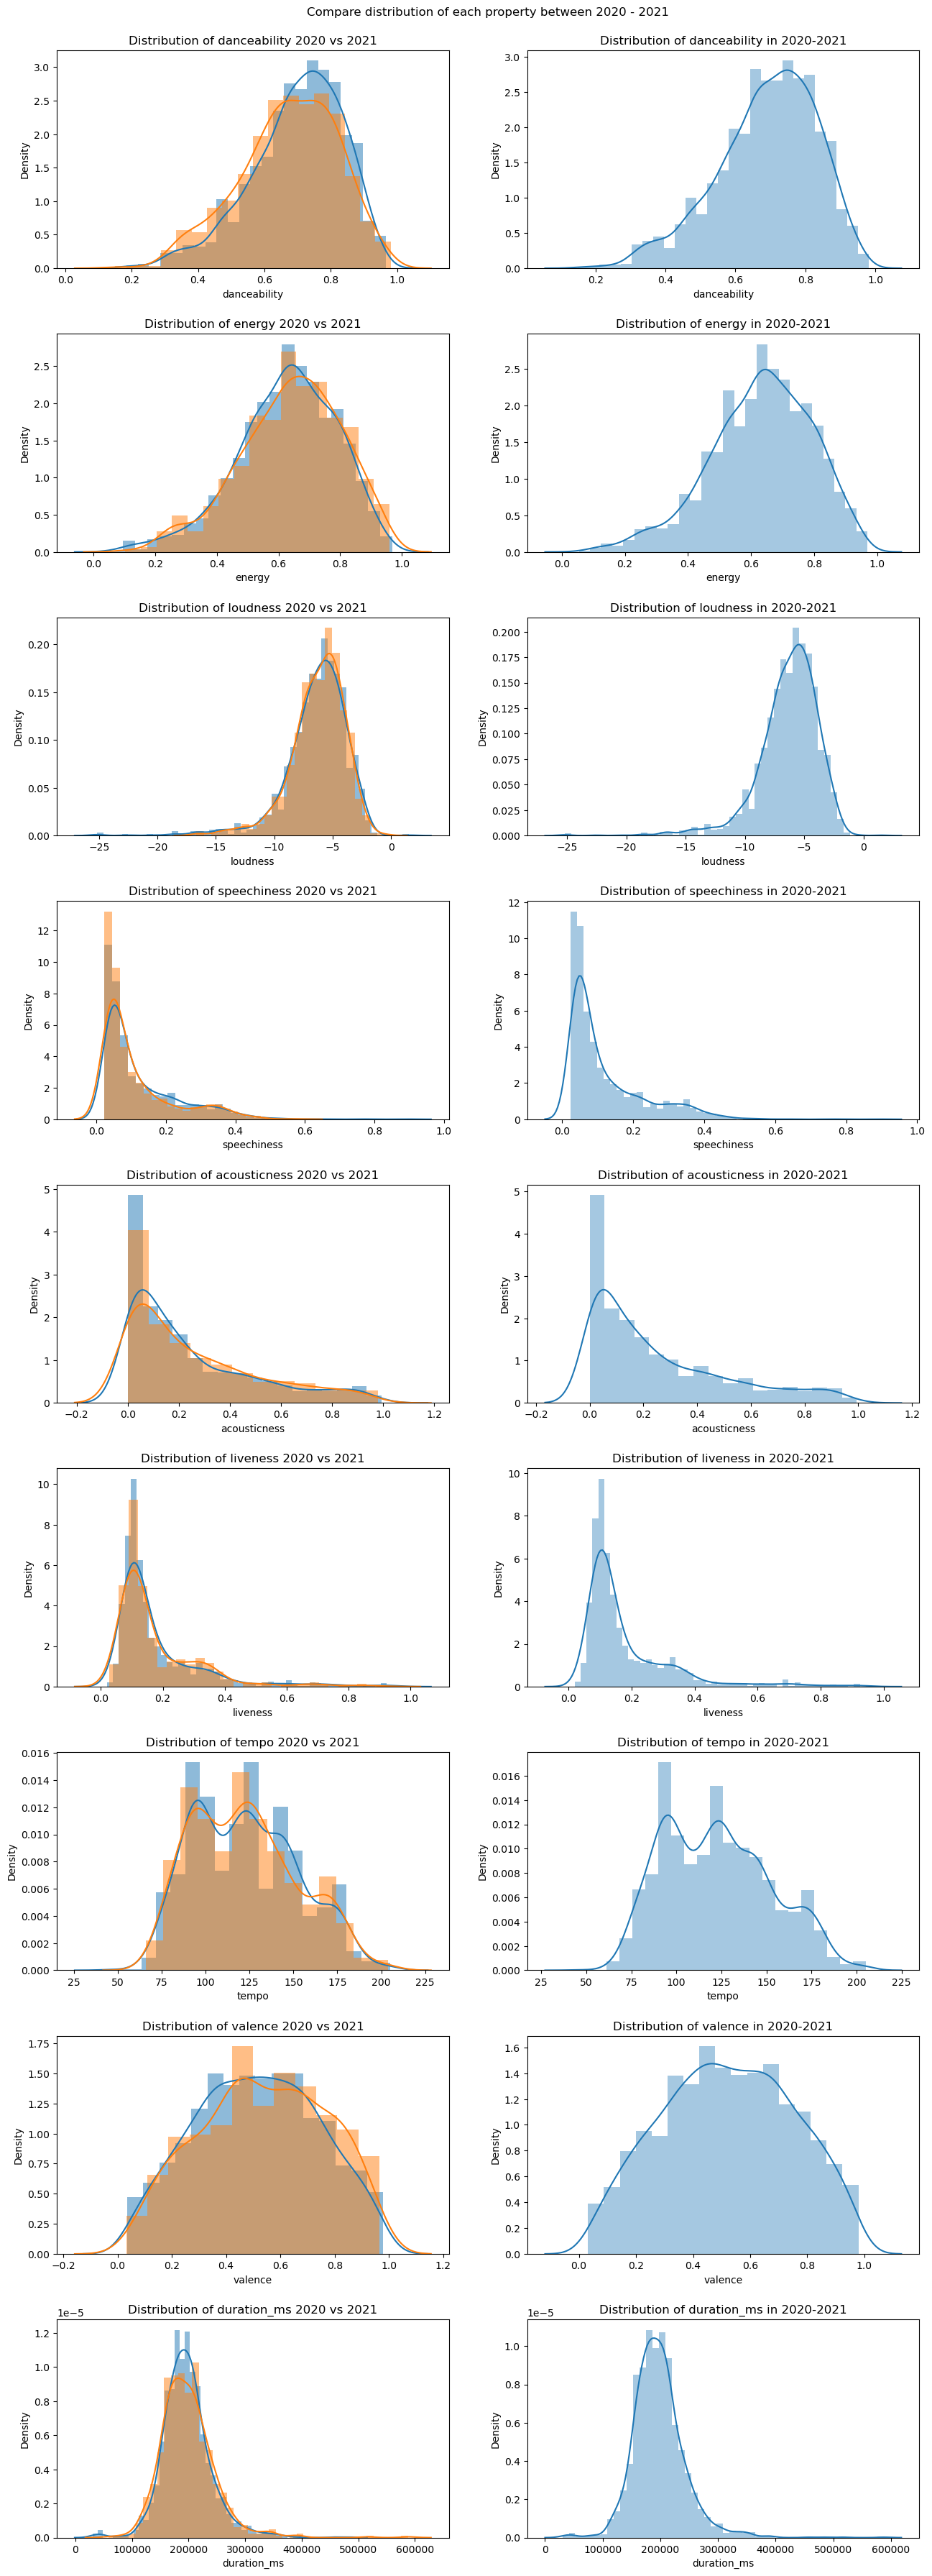

In [19]:
fig, axes = plt.subplots(9, 2, figsize=(15, 40))
for p, ax in zip(properties, axes):
    sns.distplot(song_properties_byyear_df.loc[(song_properties_byyear_df.year.isin([2019, 2020])), p], hist_kws=dict(alpha=0.5), ax=ax[0])
    sns.distplot(song_properties_byyear_df.loc[(song_properties_byyear_df.year == 2021), p], hist_kws=dict(alpha=0.5), ax=ax[0])
    ax[0].title.set_text(f'Distribution of {p} 2020 vs 2021')
    sns.distplot(song_properties_byyear_df[p], ax=ax[1])
    ax[1].title.set_text(f'Distribution of {p} in 2020-2021')

fig.suptitle('Compare distribution of each property between 2020 - 2021')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.965,
                    wspace=0.2,
                    hspace=0.3)

plt.show()

From above plots, we can conclude:
- In general, properties did not change between 2020 and 2021
- **danceability** property was high but decreased during this duration.
- **energy** was not as high as **danceability** but increased.
- **loudness** did not vary too much, it could be standard loud for a song.
- **speeechiness** started inscreasingly from early 2020 which marked talk shows, audio books, tell story songs (in Covid-19 duration, music production interupted). However, after half of year, it descreased.
- **liveness** was low in almost time. However, it strongly increased in summer and winter season because it could be the good time to go performing (it could be the consequence of online music platform).
- **tempo**  was surpringly low in early 5 month of 2020 and back to normal level in 6 months later. However, it was low again!
- **valence** was higher than average a little bit but increased.
- **duration_ms** was like **loudness**, there were only 2 strongly decreasing period.
- **accousticness** was low in almost time but strongly increased in December. 
- There was a fact that almost properties declined in December except ***Accousticness***. It could be Christmas occasion whose songs ussally is created from instrument.

---
## Preprocessing:
Before we answer the second question, we have to do something with "genre" columns for convenient analysis.

In [20]:
def extractMainGenre(x):
    listGenre = x[2:-2].split("', '")
    res = []
    for genre in listGenre:
        # befSize = len(res)
        if 'indie' not in res and (genre.find('indie') != -1 or genre.find('singer-songwriter') != -1):
            res.append('indie')
        if 'rock' not in res and (genre.find('rock') != -1):
            res.append('rock')
        if 'pop' not in res and (genre.find('pop') != -1):
            res.append('pop')
        if 'underground' not in res and (genre.find('hip hop') != -1 or genre.find('rap') != -1):
            res.append('underground')
        if 'latin' not in res and (genre.find('latin') != -1):
            res.append('latin')
        if 'r&b' not in res and (genre.find('r&b') != -1 or genre.find('soul') != -1):
            res.append('r&b')
        if 'dance' not in res and (genre.find('house') != -1 or genre.find('dance') != -1 or genre.find('techno') != -1):
            res.append('dance')
        if 'electro' not in res and (genre.find('edm') != -1 or genre.find('electro') != -1):
            res.append('electro')
        if 'country' not in res and (genre.find('country') != -1):
            res.append('country')
        if 'jazz' not in res and (genre.find('jazz') != -1 or genre.find('disco') != -1):
            res.append('jazz')
        
        # if len(res) != befSize and 'other' not in res:
        #     res.append('other')
    
    if len(res):
        return res
    else:
        return ['other']

df.genre = df.genre.apply(extractMainGenre)
trend_df = df.reindex(columns=['genre', 'popularity', 'streams']).explode('genre')

---
## What was music trend in this period?

Number of song in each genre in this period:

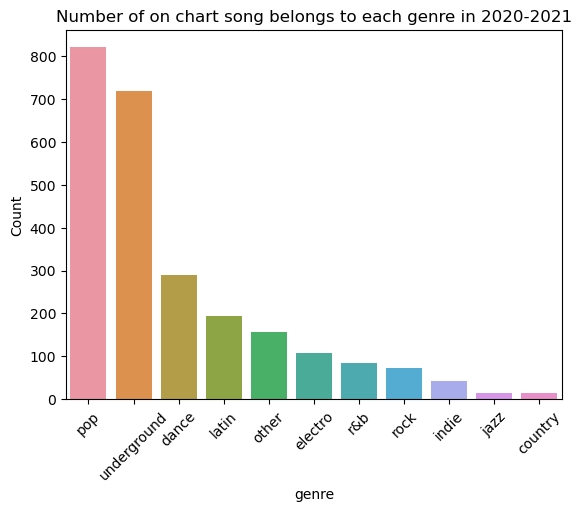

In [21]:
noSongs = trend_df.groupby('genre', as_index=False).size().sort_values('size', ascending=False)

sns.barplot(data=noSongs, x='genre', y='size')
plt.xticks(rotation=45)
plt.title('Number of on chart song belongs to each genre in 2020-2021')
plt.ylabel('Count')
plt.show()

What genre is the most popular?

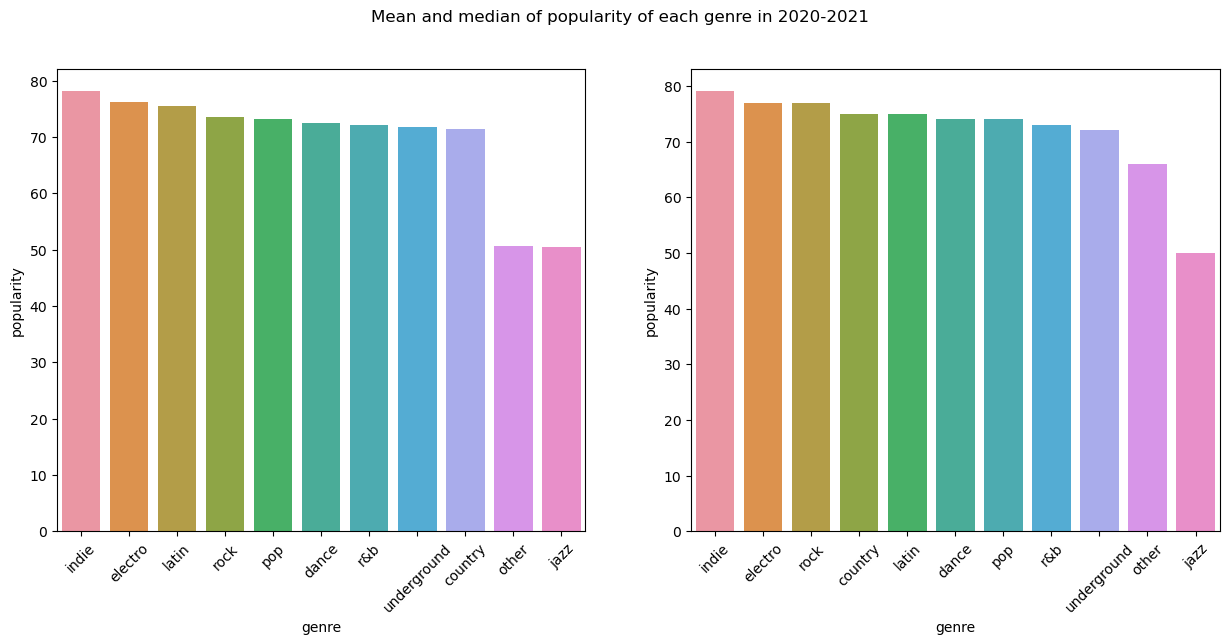

In [22]:
genreMeanPopular = trend_df.groupby('genre', as_index=False).popularity.mean().sort_values('popularity', ascending=False)
genreMedianPopular = trend_df.groupby('genre', as_index=False).popularity.median().sort_values('popularity', ascending=False)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 6))
sns.barplot(data=genreMeanPopular, x='genre', y='popularity', ax=ax0)
ax0.tick_params('x', labelrotation=45)

sns.barplot(data=genreMedianPopular, x='genre', y='popularity', ax=ax1)
ax1.tick_params('x', labelrotation=45)

fig.suptitle("Mean and median of popularity of each genre in 2020-2021")
plt.show()

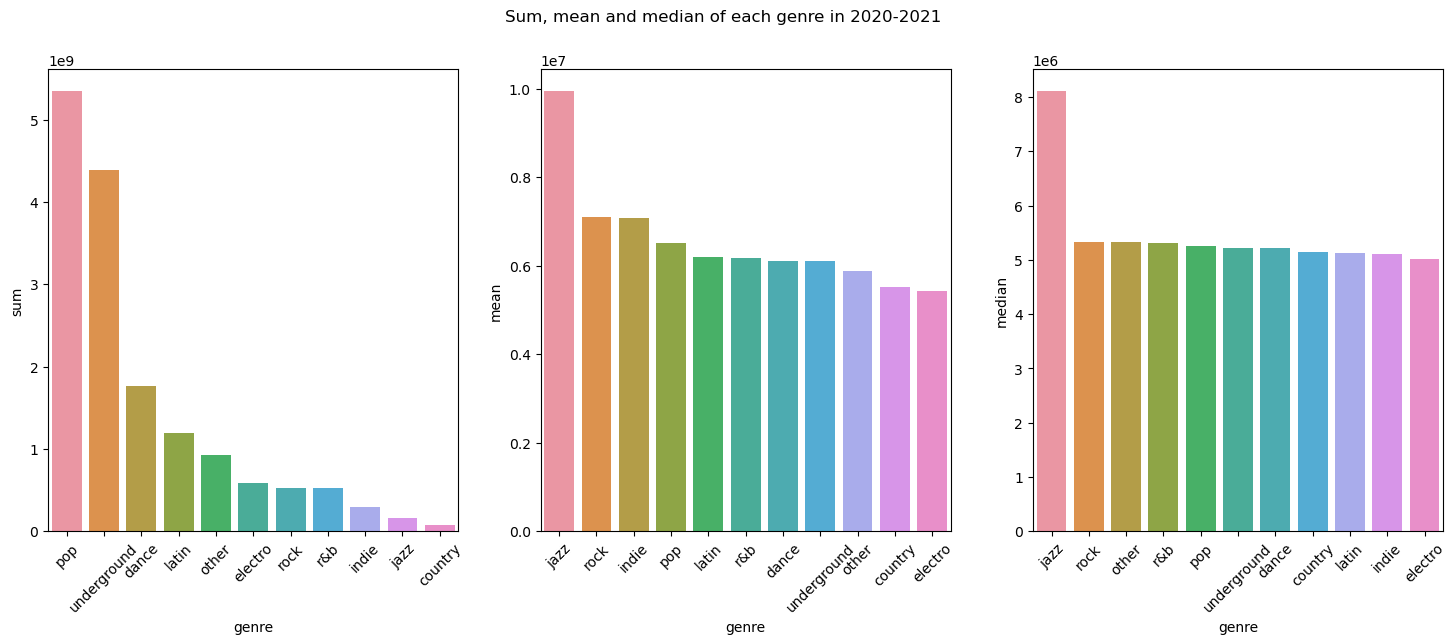

In [23]:
genreStream = trend_df.groupby('genre', as_index=False).streams.agg(['sum', 'mean', 'median'])

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for x, ax in zip(genreStream.columns, axes):
    sort_df = genreStream.sort_values(x, ascending=False)
    sns.barplot(x=sort_df.index, y=sort_df[x], ax=ax)
    ax.tick_params('x', labelrotation=45)

plt.suptitle("Sum, mean and median of each genre in 2020-2021")
plt.show()

From above plots, we can conclude:
- If we want our music to be popular with masses, we should produce production with indie, electro, latin, rock, pop, dance, r&b, underground, country genre.
- More than popularity, if we want our music have many stream, we should give a priority to pop.
- Deѕpite pop is genre has most stream, it is still double-edged sword. There is a fact that average stream per songs is not as high as our expectation but the highest is jazz. Although jazz is not as popular as pop, it are old long life genre (it's not gotten bored quickly like pop) and still have its fan overtime. Therefore, let choose jazz if you want your music to be timeless.